### 进行boxplot图绘制


In [2]:
%config InlineBackend.figure_format = 'svg' 
# 如果要保存svg格式图片，可以用上面的命令

import os
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# %matplotlib inline

# plt.style.use("ggplot")

In [3]:
# mapping experiments and mapping color
mapping_exp = {'PhiTrans+': "new_PhiTrans_align_sim_tile5ktwice500_abmilsel0", 
               'PhiTrans': "new_PhiTrans_align_sim_tile5ktwice500", 
               'PMIL-Cosine': "new_ProtoMIL_sim_Cosine_mean_tileAlltwice500_0insteval",
               "PMIL-Euclidean": "new_ProtoMIL_sim_Euclidean_mean_tile5ktwice500_0insteval",
               "CLAM-B8":  "new_CLAM_8", 
               "CLAM-B32": "new_CLAM", 
               "ABMIL": "new_ABMIL_tile5k_all", 
               "Transformer-h4": "new_Transformer"}

mapping_color = {'PhiTrans+': "#BC4CAB", 'PhiTrans': "#CD79C0", 'PMIL-Cosine': "#dd91b8", "PMIL-Euclidean": "#F4CEDD",
                "CLAM-B8":  "#B6C9D8", "CLAM-B32": "#C5B5E6", "ABMIL": "#C7C826", "Transformer-h4": "#799f80"}

In [4]:
from glob import glob

root_path = "/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status"
filename = "summary_metrics_alltimes_kfolds.csv"

## loop 所有满足条件的exp name
lists = glob(os.path.join(root_path, "new_PhiTrans_align_sim_tile*twice*"))
exp_folder_lists = [li for li in lists if os.path.isdir(li)]
print(exp_folder_lists)


total_pd = pd.DataFrame()
for exp_name in exp_folder_lists:
    eval_res = pd.read_csv(os.path.join(exp_name, filename)).iloc[:5, 3:]
    
    exp_tile_twice_num = exp_name.split("_")[-1].split("tile")[-1].split("twice")
    eval_res.insert(0, column="random inst", value=exp_tile_twice_num[0])
    eval_res.insert(1, column="iterative inst", value=exp_tile_twice_num[1])
    total_pd = pd.concat([total_pd, eval_res], axis=0)

total_pd
total_pd.to_csv(os.path.join(root_path, "dual_instance_sampling_comparison.csv"))

['/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status/new_PhiTrans_align_sim_tile2ktwice500', '/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status/new_PhiTrans_align_sim_tile10ktwice0', '/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status/new_PhiTrans_align_sim_tile5ktwice0', '/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status/new_PhiTrans_align_sim_tile5ktwice2k', '/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status/new_PhiTrans_align_sim_tileAlltwice5k', '/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status/new_PhiTrans_align_sim_tileAlltwice2k', '/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status/new_PhiTrans_align_sim_tile10ktwice1k', '/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status/new_PhiTrans_align_sim_tile5ktwice500', '/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status/new_PhiTrans_align_sim_tile500twice0', '/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status/new_PhiTrans_align_sim_tileAlltwice0', '/home/cyyan/Projects/HER2proj/models/HEROHE/

基于iterative inst，也就是twice作为x轴，然后进行boxplot，把几个重要指标都画一下，

auc，balanced acc，weighted avg_f1-score pos_f1-score	

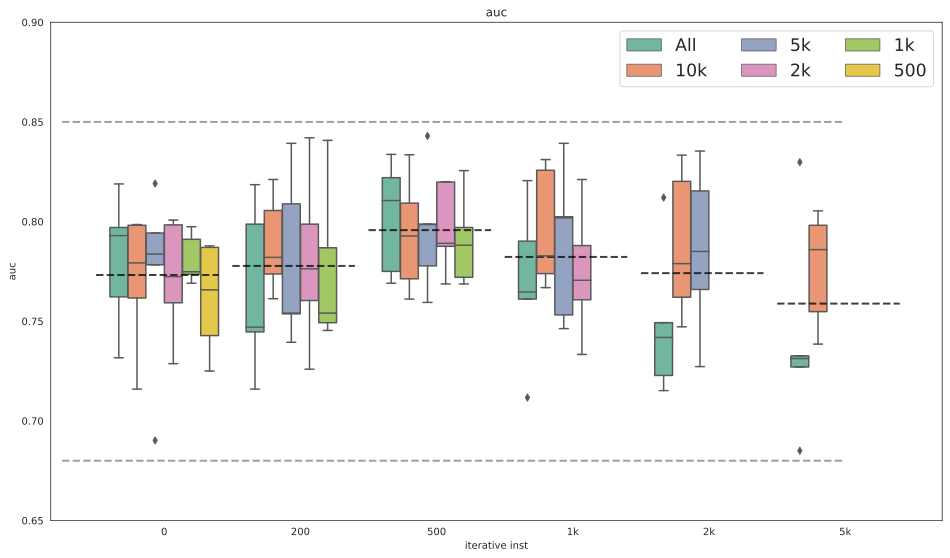

In [292]:
metric = "auc"


fig, ax = plt.subplots(figsize=(16, 9))

# sns.set_style("white")

sns.boxplot(data=total_pd, x="iterative inst", y=metric, hue="random inst", palette="Set2",
            order=["0", "200","500", "1k", "2k", "5k"],
            hue_order=["All", "10k", "5k", "2k", "1k", "500"], 
            ax=ax)

# ax.set_xlabel("Evaluation Metrics")
# ax.set_ylabel("Performance")
ax.set_facecolor("white")
ax.set_title(metric)

ax.set(
    ylim=[0.65, 0.9],
)
ax.legend(loc="upper right", ncols=3, fontsize='xx-large', facecolor="white")

ax.plot(np.linspace(-0.75, 5, 100), [0.85]*100, linestyle='dashed',
    color="grey",
    lw=2,
    alpha=0.75
)

ax.plot(np.linspace(-0.75, 5, 100), [0.68]*100, linestyle='dashed',
    color="grey",
    lw=2,
    alpha=0.75
)

for idx, iter_inst_num in enumerate(["0", "200","500", "1k", "2k", "5k"]):
    mean_auc = total_pd[total_pd["iterative inst"] == iter_inst_num][metric].mean()

    ax.plot(np.linspace(idx-0.5, idx+0.4, 100), [mean_auc]*100, linestyle='dashed',
        color="black",
        lw=2,
        alpha=0.75
    )

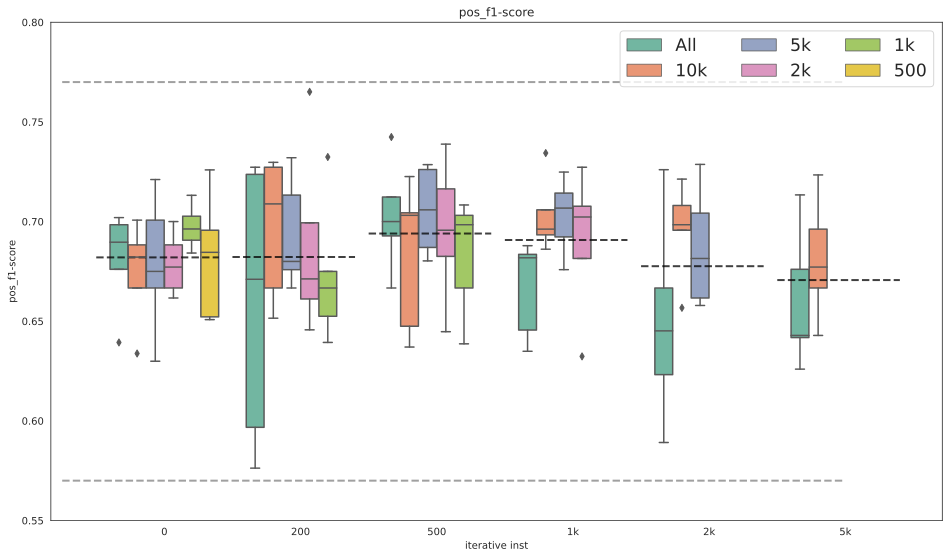

In [293]:
metric = "pos_f1-score"

fig, ax = plt.subplots(figsize=(16, 9))

# sns.set_style("white")

sns.boxplot(data=total_pd, x="iterative inst", y=metric, hue="random inst", palette="Set2",
            order=["0", "200","500", "1k", "2k", "5k"],
            hue_order=["All", "10k", "5k", "2k", "1k", "500"], 
            ax=ax)

# ax.set_xlabel("Evaluation Metrics")
# ax.set_ylabel("Performance")
ax.set_facecolor("white")
ax.set_alpha(0.1)
ax.set_title(metric)
ax.set(
    ylim=[0.55, 0.8],
)
ax.legend(loc="upper right", ncols=3, fontsize='xx-large', facecolor="white")

ax.plot(np.linspace(-0.75, 5, 100), [0.77]*100, linestyle='dashed',
    color="grey",
    lw=2,
    alpha=0.75
)

ax.plot(np.linspace(-0.75, 5, 100), [0.57]*100, linestyle='dashed',
    color="grey",
    lw=2,
    alpha=0.75
)

for idx, iter_inst_num in enumerate(["0", "200","500", "1k", "2k", "5k"]):
    mean_val = total_pd[total_pd["iterative inst"] == iter_inst_num][metric].mean()

    ax.plot(np.linspace(idx-0.5, idx+0.4, 100), [mean_val]*100, linestyle='dashed',
        color="black",
        lw=2,
        alpha=0.75
    )

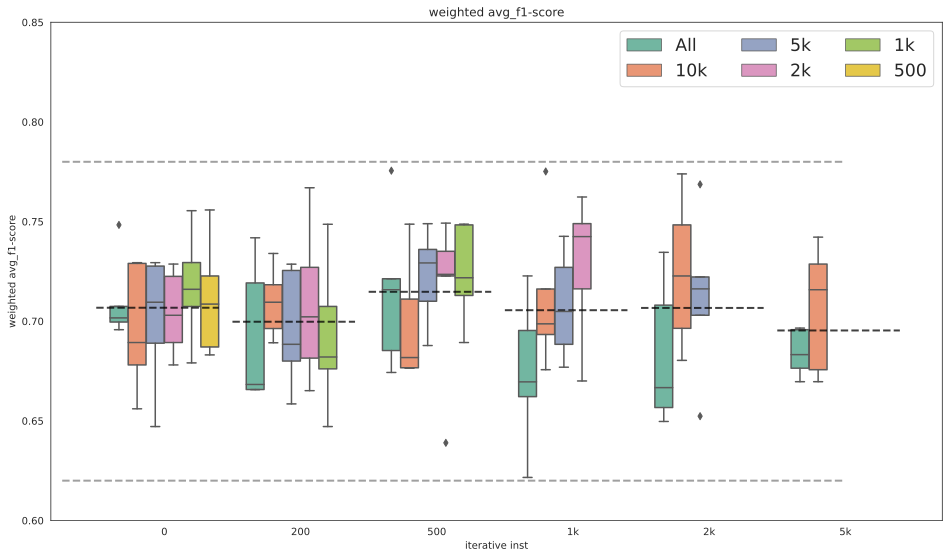

In [294]:
metric = "weighted avg_f1-score"


fig, ax = plt.subplots(figsize=(16, 9))

# sns.set_style("white")

sns.boxplot(data=total_pd, x="iterative inst", y=metric, hue="random inst", palette="Set2",
            order=["0", "200","500", "1k", "2k", "5k"],
            hue_order=["All", "10k", "5k", "2k", "1k", "500"], 
            ax=ax)

# ax.set_xlabel("Evaluation Metrics")
# ax.set_ylabel("Performance")
ax.set_facecolor("white")
ax.set_alpha(0.1)
ax.set_title(metric)
ax.set(
    ylim=[0.6, 0.85],
)
ax.legend(loc="upper right", ncols=3, fontsize='xx-large', facecolor="white")

ax.plot(np.linspace(-0.75, 5, 100), [0.78]*100, linestyle='dashed',
    color="grey",
    lw=2,
    alpha=0.75
)

ax.plot(np.linspace(-0.75, 5, 100), [0.62]*100, linestyle='dashed',
    color="grey",
    lw=2,
    alpha=0.75
)

for idx, iter_inst_num in enumerate(["0", "200","500", "1k", "2k", "5k"]):
    mean_val = total_pd[total_pd["iterative inst"] == iter_inst_num][metric].mean()

    ax.plot(np.linspace(idx-0.5, idx+0.4, 100), [mean_val]*100, linestyle='dashed',
        color="black",
        lw=2,
        alpha=0.75
    )

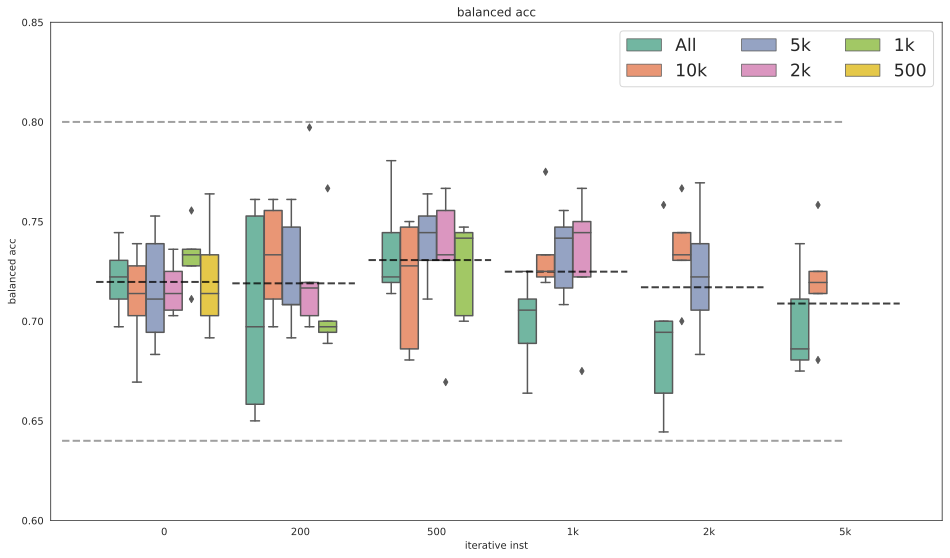

In [295]:
metric = "balanced acc"


fig, ax = plt.subplots(figsize=(16, 9))

# sns.set_style("white")

sns.boxplot(data=total_pd, x="iterative inst", y=metric, hue="random inst", palette="Set2",
            order=["0", "200","500", "1k", "2k", "5k"],
            hue_order=["All", "10k", "5k", "2k", "1k", "500"], 
            ax=ax)

# ax.set_xlabel("Evaluation Metrics")
# ax.set_ylabel("Performance")
ax.set_facecolor("white")
ax.set_alpha(0.1)
ax.set_title(metric)
ax.set(
    ylim=[0.6, 0.85],
)
ax.legend(loc="upper right", ncols=3, fontsize='xx-large', facecolor="white")

ax.plot(np.linspace(-0.75, 5, 100), [0.8]*100, linestyle='dashed',
    color="grey",
    lw=2,
    alpha=0.75
)

ax.plot(np.linspace(-0.75, 5, 100), [0.64]*100, linestyle='dashed',
    color="grey",
    lw=2,
    alpha=0.75
)

for idx, iter_inst_num in enumerate(["0", "200","500", "1k", "2k", "5k"]):
    mean_val = total_pd[total_pd["iterative inst"] == iter_inst_num][metric].mean()

    ax.plot(np.linspace(idx-0.5, idx+0.4, 100), [mean_val]*100, linestyle='dashed',
        color="black",
        lw=2,
        alpha=0.75
    )

基于random inst，也就是开始的random作为x轴，然后进行boxplot，不同格子表示不同的twice

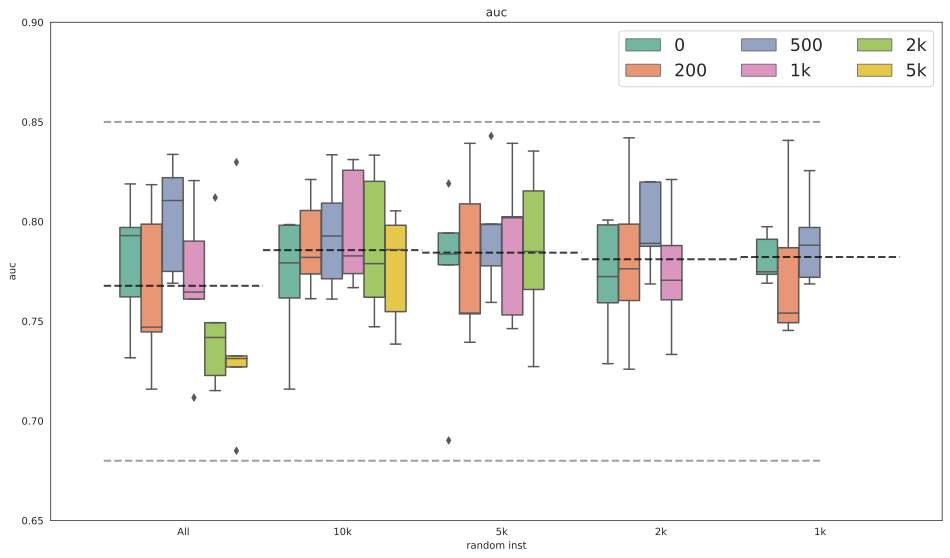

In [296]:
metric = "auc"

fig, ax = plt.subplots(figsize=(16, 9))

sns.set_style("white")

sns.boxplot(data=total_pd, x="random inst", y=metric, hue="iterative inst",  palette="Set2",
            order=["All", "10k", "5k", "2k", "1k"],
            hue_order=["0", "200","500", "1k", "2k", "5k"])

# ax.set_xlabel("Evaluation Metrics")
# ax.set_ylabel("Performance")
ax.set_facecolor("white")
ax.set_title(metric)
ax.set(
    ylim=[0.65, 0.9],
)
ax.legend(loc="upper right", ncols=3, fontsize='xx-large', facecolor="white")

ax.plot(np.linspace(-0.5, 4, 100), [0.85]*100, linestyle='dashed',
    color="grey",
    lw=2,
    alpha=0.75
)

ax.plot(np.linspace(-0.5, 4, 100), [0.68]*100, linestyle='dashed',
    color="grey",
    lw=2,
    alpha=0.75
)

for idx, random_inst_num in enumerate(["All", "10k", "5k", "2k", "1k"]):
    mean_auc = total_pd[total_pd["random inst"] == random_inst_num][metric].mean()

    ax.plot(np.linspace(idx-0.5, idx+0.5, 100), [mean_auc]*100, linestyle='dashed',
        color="black",
        lw=2,
        alpha=0.75
    )

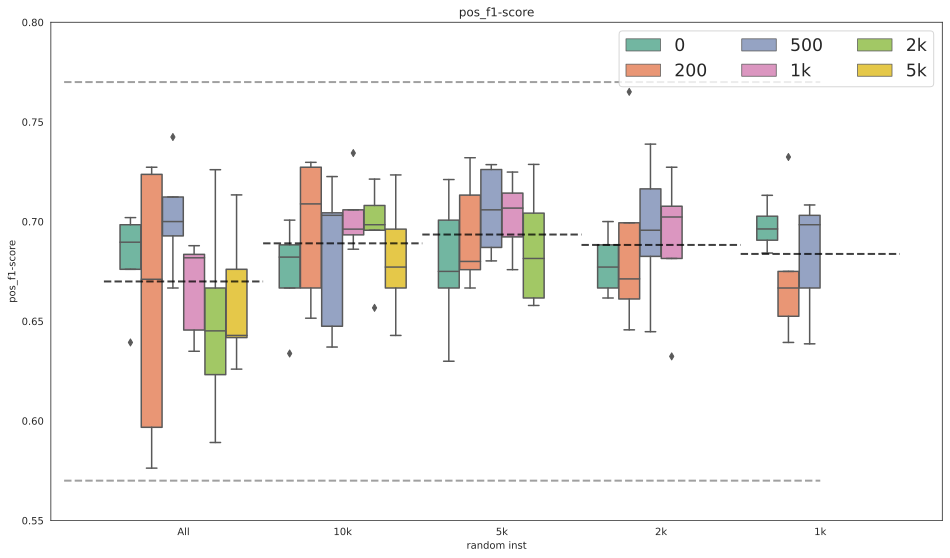

In [297]:
metric = "pos_f1-score"

fig, ax = plt.subplots(figsize=(16, 9))

sns.set_style("white")

sns.boxplot(data=total_pd, x="random inst", y=metric, hue="iterative inst",  palette="Set2",
            order=["All", "10k", "5k", "2k", "1k"],
            hue_order=["0", "200","500", "1k", "2k", "5k"])

# ax.set_xlabel("Evaluation Metrics")
# ax.set_ylabel("Performance")
ax.set_facecolor("white")
ax.set_title(metric)

ax.set(
    ylim=[0.55, 0.8],
)
ax.legend(loc="upper right", ncols=3, fontsize='xx-large', facecolor="white")

ax.plot(np.linspace(-0.75, 4, 100), [0.77]*100, linestyle='dashed',
    color="grey",
    lw=2,
    alpha=0.75
)

ax.plot(np.linspace(-0.75, 4, 100), [0.57]*100, linestyle='dashed',
    color="grey",
    lw=2,
    alpha=0.75
)

for idx, random_inst_num in enumerate(["All", "10k", "5k", "2k", "1k"]):
    mean_auc = total_pd[total_pd["random inst"] == random_inst_num][metric].mean()

    ax.plot(np.linspace(idx-0.5, idx+0.5, 100), [mean_auc]*100, linestyle='dashed',
        color="black",
        lw=2,
        alpha=0.75
    )

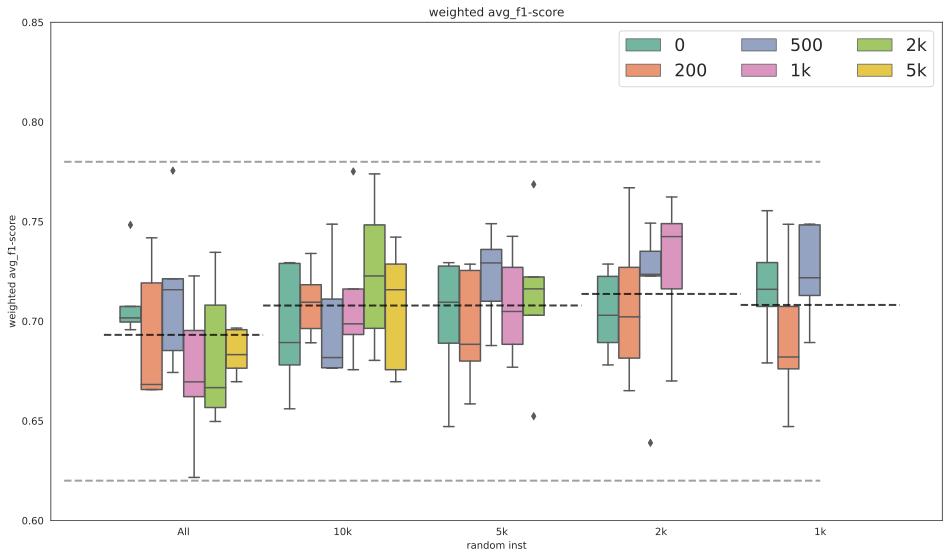

In [298]:
metric = "weighted avg_f1-score"

fig, ax = plt.subplots(figsize=(16, 9))

sns.set_style("white")

sns.boxplot(data=total_pd, x="random inst", y=metric, hue="iterative inst",  palette="Set2",
            order=["All", "10k", "5k", "2k", "1k"],
            hue_order=["0", "200","500", "1k", "2k", "5k"])

# ax.set_xlabel("Evaluation Metrics")
# ax.set_ylabel("Performance")
ax.set_facecolor("white")
ax.set_title(metric)

ax.set(
    ylim=[0.6, 0.85],
)
ax.legend(loc="upper right", ncols=3, fontsize='xx-large', facecolor="white")


ax.plot(np.linspace(-0.75, 4, 100), [0.78]*100, linestyle='dashed',
    color="grey",
    lw=2,
    alpha=0.75
)

ax.plot(np.linspace(-0.75, 4, 100), [0.62]*100, linestyle='dashed',
    color="grey",
    lw=2,
    alpha=0.75
)

for idx, random_inst_num in enumerate(["All", "10k", "5k", "2k", "1k"]):
    mean_auc = total_pd[total_pd["random inst"] == random_inst_num][metric].mean()

    ax.plot(np.linspace(idx-0.5, idx+0.5, 100), [mean_auc]*100, linestyle='dashed',
        color="black",
        lw=2,
        alpha=0.75
    )

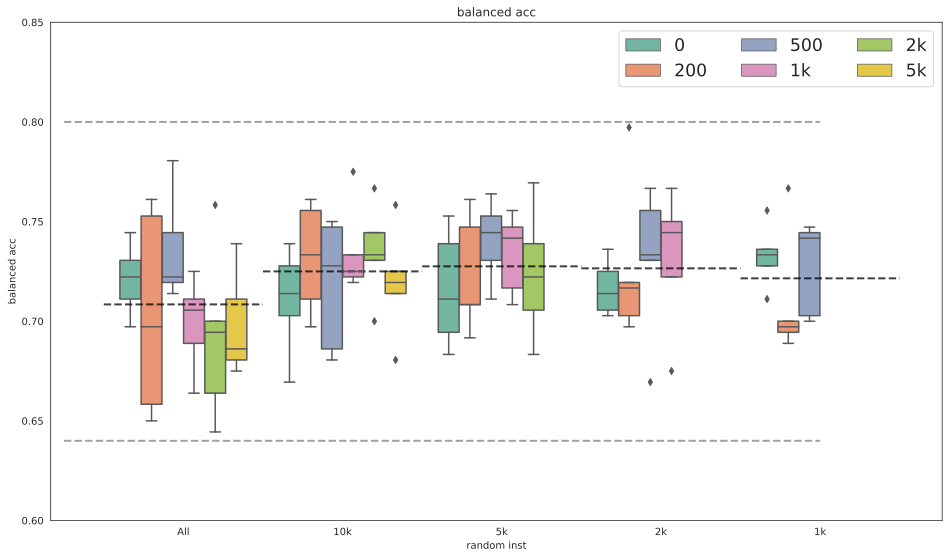

In [299]:
metric = "balanced acc"

fig, ax = plt.subplots(figsize=(16, 9))

sns.set_style("white")

sns.boxplot(data=total_pd, x="random inst", y=metric, hue="iterative inst",  palette="Set2",
            order=["All", "10k", "5k", "2k", "1k"],
            hue_order=["0", "200","500", "1k", "2k", "5k"])

# ax.set_xlabel("Evaluation Metrics")
# ax.set_ylabel("Performance")
ax.set_facecolor("white")
ax.set_title(metric)

ax.set(
    ylim=[0.6, 0.85],
)
ax.legend(loc="upper right", ncols=3, fontsize='xx-large', facecolor="white")


ax.plot(np.linspace(-0.75, 4, 100), [0.8]*100, linestyle='dashed',
    color="grey",
    lw=2,
    alpha=0.75
)

ax.plot(np.linspace(-0.75, 4, 100), [0.64]*100, linestyle='dashed',
    color="grey",
    lw=2,
    alpha=0.75
)

for idx, random_inst_num in enumerate(["All", "10k", "5k", "2k", "1k"]):
    mean_auc = total_pd[total_pd["random inst"] == random_inst_num][metric].mean()

    ax.plot(np.linspace(idx-0.5, idx+0.5, 100), [mean_auc]*100, linestyle='dashed',
        color="black",
        lw=2,
        alpha=0.75
    )

### 下面是针对Yale 数据集的dual instance sampling results结果的plot

In [126]:
from glob import glob

root_path = "/home/cyyan/Projects/HER2proj/models/Yale/HER2status"
filename = "summary_metrics_alltimes_kfolds.csv"

## loop 所有满足条件的exp name
lists = glob(os.path.join(root_path, "PhiTrans_tile*twice*_0abmil_0sel"))
exp_folder_lists = [li for li in lists if os.path.isdir(li)]
print(f"{len(exp_folder_lists)}\n")


total_pd = pd.DataFrame()
for exp_name in exp_folder_lists:
    print(exp_name)

    eval_res = pd.read_csv(os.path.join(exp_name, filename)).iloc[-2:-1, 3:]
    
    exp_tile_twice_num = exp_name.split("tile")[-1].split("_")
    eval_res.insert(0, column="random inst", value=exp_tile_twice_num[0])
    eval_res.insert(1, column="iterative inst", value=exp_tile_twice_num[1].split("twice")[-1])
    total_pd = pd.concat([total_pd, eval_res], axis=0)

total_pd["random inst"] = total_pd["random inst"].replace("2k", "2000")
total_pd["random inst"] = total_pd["random inst"].replace("1k", "1000")

# total_pd.to_csv(os.path.join(root_path, "Yale_dual_instance_sampling_comparison.csv"))

total_pd["random inst"] = total_pd["random inst"].replace("All", "5000")
total_pd["iterative inst"] = total_pd["iterative inst"].replace("All", "5000")

total_pd["random inst"] = total_pd["random inst"].astype(int)
total_pd["iterative inst"] = total_pd["iterative inst"].astype(int)

print(total_pd.loc[:, "random inst"].unique())
print(total_pd.loc[:, "iterative inst"].unique())
total_pd

18

/home/cyyan/Projects/HER2proj/models/Yale/HER2status/PhiTrans_tileAll_twice200_0abmil_0sel
/home/cyyan/Projects/HER2proj/models/Yale/HER2status/PhiTrans_tile2k_twice200_0abmil_0sel
/home/cyyan/Projects/HER2proj/models/Yale/HER2status/PhiTrans_tile100_twiceAll_0abmil_0sel
/home/cyyan/Projects/HER2proj/models/Yale/HER2status/PhiTrans_tile2k_twice1000_0abmil_0sel
/home/cyyan/Projects/HER2proj/models/Yale/HER2status/PhiTrans_tile2k_twice500_0abmil_0sel
/home/cyyan/Projects/HER2proj/models/Yale/HER2status/PhiTrans_tile1k_twice500_0abmil_0sel
/home/cyyan/Projects/HER2proj/models/Yale/HER2status/PhiTrans_tileAll_twice1000_0abmil_0sel
/home/cyyan/Projects/HER2proj/models/Yale/HER2status/PhiTrans_tile1000_twiceAll_0abmil_0sel
/home/cyyan/Projects/HER2proj/models/Yale/HER2status/PhiTrans_tile200_twiceAll_0abmil_0sel
/home/cyyan/Projects/HER2proj/models/Yale/HER2status/PhiTrans_tileAll_twice2000_0abmil_0sel
/home/cyyan/Projects/HER2proj/models/Yale/HER2status/PhiTrans_tile1k_twice200_0abmil_0

,random inst,iterative inst,neg_precision,neg_recall,neg_f1-score,neg_support,pos_precision,pos_recall,pos_f1-score,pos_support,...,macro avg_precision,macro avg_recall,macro avg_f1-score,macro avg_support,weighted avg_precision,weighted avg_recall,weighted avg_f1-score,weighted avg_support,balanced acc,auc
25,5000,200,0.633580,0.747368,0.667531,19.0,0.572136,0.629474,0.587656,19.0,...,0.602858,0.688421,0.627593,38.0,0.602858,0.688421,0.627593,38.0,0.688421,0.790083
25,2000,200,0.617363,0.696842,0.638450,19.0,0.621768,0.688421,0.637282,19.0,...,0.619565,0.692632,0.637866,38.0,0.619565,0.692632,0.637866,38.0,0.692632,0.814958
25,100,5000,0.702772,0.825263,0.747211,19.0,0.678428,0.644211,0.653471,19.0,...,0.690600,0.734737,0.700341,38.0,0.690600,0.734737,0.700341,38.0,0.734737,0.853518
25,2000,1000,0.655497,0.738947,0.684215,19.0,0.675987,0.703158,0.675970,19.0,...,0.665742,0.721053,0.680092,38.0,0.665742,0.721053,0.680092,38.0,0.721053,0.818947
25,2000,500,0.708661,0.734737,0.704207,19.0,0.667389,0.722105,0.682050,19.0,...,0.688025,0.728421,0.693128,38.0,0.688025,0.728421,0.693128,38.0,0.728421,0.818560
25,1000,500,0.708661,0.734737,0.704207,19.0,0.667389,0.722105,0.682050,19.0,...,0.688025,0.728421,0.693128,38.0,0.688025,0.728421,0.693128,38.0,0.728421,0.818560
25,5000,1000,0.634531,0.781053,0.686776,19.0,0.640158,0.635789,0.620691,19.0,...,0.637345,0.708421,0.653734,38.0,0.637345,0.708421,0.653734,38.0,0.708421,0.794294
25,1000,5000,0.647634,0.694737,0.657154,19.0,0.703645,0.753684,0.707487,19.0,...,0.675640,0.724211,0.682321,38.0,0.675640,0.724211,0.682321,38.0,0.724211,0.834017
25,200,5000,0.650398,0.760000,0.692248,19.0,0.693289,0.692632,0.678514,19.0,...,0.671844,0.726316,0.685381,38.0,0.671844,0.726316,0.685381,38.0,0.726316,0.822659
25,5000,2000,0.663146,0.867368,0.737767,19.0,0.599349,0.538947,0.559120,19.0,...,0.631248,0.703158,0.648443,38.0,0.631248,0.703158,0.648443,38.0,0.703158,0.787258


先plot scatter 试试

<Axes: xlabel='auc', ylabel='balanced acc'>

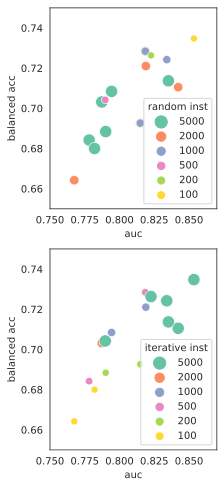

In [125]:

fig, ax = plt.subplots(2, 1, figsize=(3, 8))

ax[0].set(xlim=[0.75, 0.87])
ax[0].set(ylim=[0.65, 0.75])

sns.scatterplot(data=total_pd, x="auc", y="balanced acc", 
                hue_order=[5000, 2000, 1000, 500, 200, 100],
                hue="random inst", 
                palette="Set2", 
                size= "random inst",
                sizes=(50, 150), legend="full",
                ax=ax[0]) # random inst
# plt.legend(None)

ax[1].set(xlim=[0.75, 0.87])
ax[1].set(ylim=[0.65, 0.75])

sns.scatterplot(data=total_pd, x="auc", y="balanced acc", 
                hue_order=[5000, 2000, 1000, 500, 200, 100],
                hue="iterative inst", 
                palette="Set2",  
                size= "iterative inst",
                sizes=(50, 150), legend="full",
                ax=ax[1]) # random inst
# plt.legend(None)


<Axes: xlabel='auc', ylabel='macro avg_f1-score'>

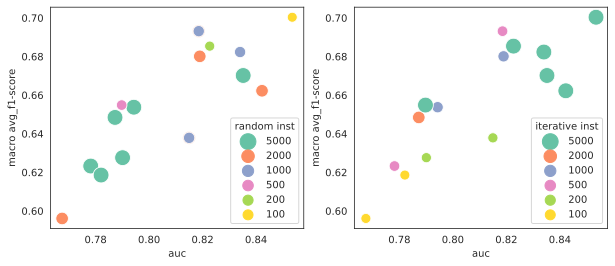

In [106]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(data=total_pd, x="auc", y="macro avg_f1-score", 
                hue_order=[5000, 2000, 1000, 500, 200, 100],
                hue="random inst", 
                palette="Set2", 
                size= "random inst",
                sizes=(100, 250), legend="full",
                ax=ax[0]) # random inst
# plt.legend(None)

sns.scatterplot(data=total_pd, x="auc", y="macro avg_f1-score", 
                hue_order=[5000, 2000, 1000, 500, 200, 100],
                hue="iterative inst", 
                palette="Set2",  
                size= "iterative inst",
                sizes=(100, 250), legend="full",
                ax=ax[1]) # random inst
# plt.legend(None)

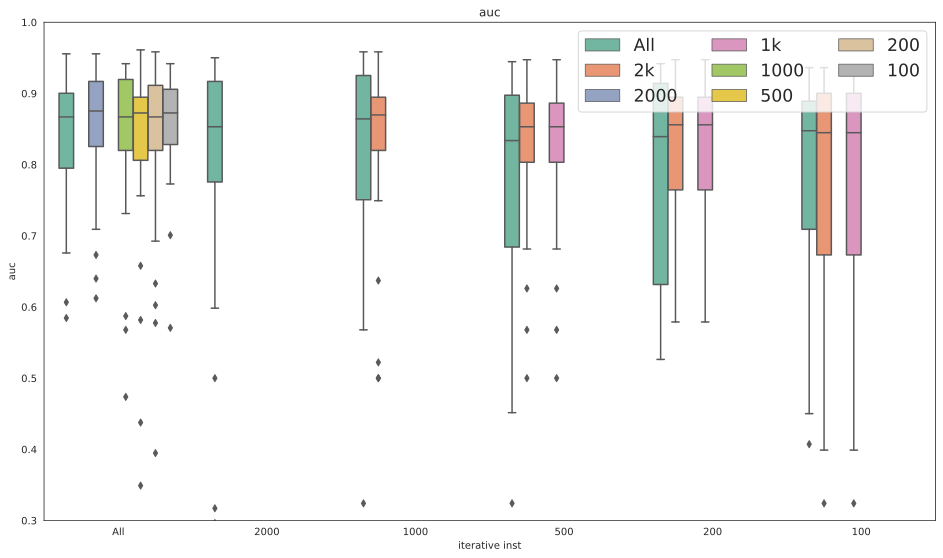

In [40]:
metric = "auc"


fig, ax = plt.subplots(figsize=(16, 9))

# sns.set_style("white")

sns.boxplot(data=total_pd, x="iterative inst", y=metric, hue="random inst", palette="Set2",
            order=['All', '2000', '1000', '500', '200', '100'],
            hue_order=['All', '2k', '2000', '1k', '1000', '500', '200', '100'], 
            ax=ax)

# ax.set_xlabel("Evaluation Metrics")
# ax.set_ylabel("Performance")
ax.set_facecolor("white")
ax.set_title(metric)

ax.set(
    ylim=[0.3, 1],
)
ax.legend(loc="upper right", ncols=3, fontsize='xx-large', facecolor="white")

# ax.plot(np.linspace(-0.75, 5, 100), [0.85]*100, linestyle='dashed',
#     color="grey",
#     lw=2,
#     alpha=0.75
# )

# ax.plot(np.linspace(-0.75, 5, 100), [0.68]*100, linestyle='dashed',
#     color="grey",
#     lw=2,
#     alpha=0.75
# )

# for idx, iter_inst_num in enumerate(["0", "200","500", "1k", "2k", "5k"]):
#     mean_auc = total_pd[total_pd["iterative inst"] == iter_inst_num][metric].mean()

#     ax.plot(np.linspace(idx-0.5, idx+0.4, 100), [mean_auc]*100, linestyle='dashed',
#         color="black",
#         lw=2,
#         alpha=0.75
#     )

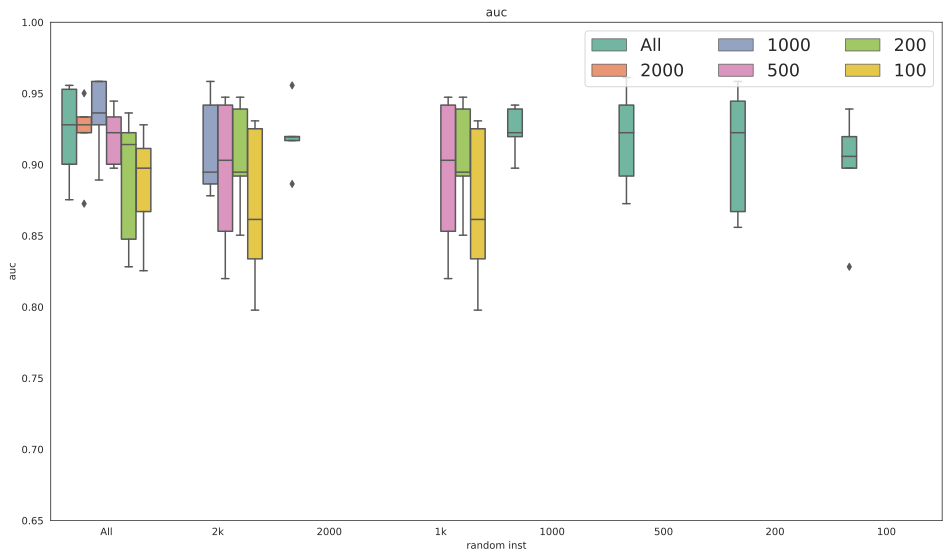

In [25]:
metric = "auc"

fig, ax = plt.subplots(figsize=(16, 9))

sns.set_style("white")

sns.boxplot(data=total_pd, x="random inst", y=metric, hue="iterative inst",  palette="Set2",
            order=['All', '2k', '2000', '1k', '1000', '500', '200', '100'],
            hue_order=['All', '2000', '1000', '500', '200', '100'])

# ax.set_xlabel("Evaluation Metrics")
# ax.set_ylabel("Performance")
ax.set_facecolor("white")
ax.set_title(metric)
ax.set(
    ylim=[0.65, 1.0],
)
ax.legend(loc="upper right", ncols=3, fontsize='xx-large', facecolor="white")

# ax.plot(np.linspace(-0.5, 4, 100), [0.85]*100, linestyle='dashed',
#     color="grey",
#     lw=2,
#     alpha=0.75
# )

# ax.plot(np.linspace(-0.5, 4, 100), [0.68]*100, linestyle='dashed',
#     color="grey",
#     lw=2,
#     alpha=0.75
# )

# for idx, random_inst_num in enumerate(["All", "10k", "5k", "2k", "1k"]):
#     mean_auc = total_pd[total_pd["random inst"] == random_inst_num][metric].mean()

#     ax.plot(np.linspace(idx-0.5, idx+0.5, 100), [mean_auc]*100, linestyle='dashed',
#         color="black",
#         lw=2,
#         alpha=0.75
#     )